In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For the choropleth 
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls 

# For the SIR Model 
from scipy.integrate import odeint 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-28-2020.csv", index_col = "Province_State")
covid_df.Last_Update = pd.to_datetime(covid_df["Last_Update"])                        # Converted Last_Update data to datetime format
covid_df["State Abrr"] = ["AL", "AK", "AS", "AZ", "AR", "CA", "CO", "CT", "DE", " ", "DC", "FL", "GA", " ", "GU", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", 
                          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "MP", "OH", "OK", "OR", "PA", "PR", "RI", "SC", "SD", 
                            "TN", "TX", "UT", "VT", "VI", "VA", "WA", "WV", "WI", "WY", " "]
covid_df["Population"] = [4903185, 731545, 55641, 7278717, 3017825, 39512223, 5758736, 3565287, 973764, 0, 705749, 21477737, 10617423, 0, 165718, 1415872, 1787065, 12671821,
                          6732219, 3155070, 2913314, 4467673, 4648794, 1344212, 6045680, 6892503, 9986857, 5639632, 2976149, 6137428, 1068778, 1934408, 3080156, 1359711, 8882190,
                          2096829, 19453561, 10448084, 762062, 55194, 11689100, 3956971, 4217737, 12801989, 3193694, 1059361, 5148714, 884659, 6829174, 28995881, 3205958, 623989, 104914,
                          8535519, 7614893, 1792147, 5822434, 578759, 0]

In [0]:
drop_rows = ["Diamond Princess", "Grand Princess", "Recovered"]                     # Removing useless rows, such as cruise ships
covid_df = covid_df.drop(drop_rows, axis = 0)

In [0]:
drop_cols = ["UID", "ISO3", "FIPS", "Country_Region", "Lat", "Long_"]               # Removing useless columns, such as province codes
covid_df = covid_df.drop(drop_cols, axis = 1)


In [0]:
'''                                                                    CHOROPLETH BOILERPLATE CODE                                                                              '''

# 1 -> Identifier Label 
covid_df["Label"] = covid_df["State Abrr"] + '<br>' + "Confirmed: " + covid_df["Confirmed"].astype(str) + '<br>' + "Deaths: " + covid_df["Deaths"].astype(str) + '<br>' + "Mortality Rate: " + covid_df["Mortality_Rate"].astype(str)

# 2 -> Data Object 
data_obj = [dict(type = "choropleth", autocolorscale = True, locations = covid_df["State Abrr"], z = covid_df["Mortality_Rate"], locationmode = "USA-states", text = covid_df["Label"], colorbar = dict(title = "Deaths"))]
              
# 3 -> Layout Object
layout_obj = dict(title = "State Vise COVID-19 Statistics", geo = dict(scope = "usa", projection = dict(type = "albers usa"), showlakes = False,),)

# 4 -> Make Plot
choro_plot = dict(data = data_obj, layout = layout_obj)
py.iplot(choro_plot, filename = "COVID_USA_DAILY_CHOROPLOT")

In [0]:

data_incidence = [dict(type = "choropleth", autocolorscale = True, locations = covid_df["State Abrr"], z = covid_df["Incident_Rate"], locationmode = "USA-states", text = covid_df["Label"], colorbar = dict(title = "Incidence"))]
layout_incidence = dict(title = "COVID Incidence by State", geo = dict(scope = "usa", projection = dict(type = "albers usa"), showlakes = False,),)
choro_plot = dict(data = data_incidence, layout = layout_incidence)
py.iplot(choro_plot, filename = "COVID_USA_STATE_INCIDENCE")

In [0]:
data_testing = [dict(type = "choropleth", autocolorscale = True, locations = covid_df["State Abrr"], z = covid_df["Testing_Rate"], locationmode = "USA-states", text = covid_df["Label"], colorbar = dict(title = "Testing"))]
layout_testing = dict(title = "COVID Testing by State", geo = dict(scope = "usa", projection = dict(type = "albers usa"), showlakes = False,),)
choro_plot = dict(data = data_testing, layout = layout_testing)
py.iplot(choro_plot, filename = "COVID_USA_STATE_TESTING")

# EDA - Time Series Data

In [0]:
covid_ts_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv", index_col = "Province_State")
# covid_ts_confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv', index_col = 'Province_State')
covid_ts_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,16,AS,ASM,16,60.0,NaN,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guam,316,GU,GUM,316,66.0,NaN,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170,171,172,172,172,175,175,177,179,179,179,179,179,180,180,183,183,183
Northern Mariana Islands,580,MP,MNP,580,69.0,NaN,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,24,26,26,26,27,28,30,30,30,30,30
Puerto Rico,630,PR,PRI,630,72.0,NaN,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185,5329,5352,5536,5690
Virgin Islands,850,VI,VIR,850,78.0,NaN,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,71,71,71,71,71,71,72,72,72,72


In [0]:
covid_ts_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv', index_col = 'Province_State')
covid_ts_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,16,AS,ASM,16,60.0,NaN,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guam,316,GU,GUM,316,66.0,NaN,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Northern Mariana Islands,580,MP,MNP,580,69.0,NaN,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Puerto Rico,630,PR,PRI,630,72.0,NaN,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99,99,102,107,108,111,113,114,115,117,122,122,123,124,124,125,126,126,127,127,129,129,129,131,132,133,136,136,138,140,140,141,142,142,142,142,143,144,146,146
Virgin Islands,850,VI,VIR,850,78.0,NaN,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [0]:
covid_ts_confirmed = covid_ts_confirmed.drop(columns = ['UID', 'iso2', 'code3', 'iso3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
covid_ts_deaths = covid_ts_deaths.drop(columns = ['UID', 'iso2', 'code3', 'iso3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])

covid_ts_confirmed = covid_ts_confirmed.drop(["Diamond Princess", "Grand Princess"], axis = 0)
covid_ts_deaths = covid_ts_deaths.drop(["Diamond Princess", "Grand Princess"], axis = 0)


In [0]:
covid_ts_confirmed.head()

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guam,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170,171,172,172,172,175,175,177,179,179,179,179,179,180,180,183,183,183
Northern Mariana Islands,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,24,26,26,26,27,28,30,30,30,30,30
Puerto Rico,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185,5329,5352,5536,5690
Virgin Islands,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,71,71,71,71,71,71,72,72,72,72


In [0]:
covid_ts_deaths.head()

,Admin2,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,NaN,55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guam,NaN,164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Northern Mariana Islands,NaN,55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Puerto Rico,NaN,2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99,99,102,107,108,111,113,114,115,117,122,122,123,124,124,125,126,126,127,127,129,129,129,131,132,133,136,136,138,140,140,141,142,142,142,142,143,144,146,146
Virgin Islands,NaN,107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [0]:
covid_ts_confirmed.isnull().sum()

Admin2     5
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
          ..
6/9/20     0
6/10/20    0
6/11/20    0
6/12/20    0
6/13/20    0
Length: 145, dtype: int64

In [0]:
covid_ts_deaths.isnull().sum()

Admin2        5
Population    0
1/22/20       0
1/23/20       0
1/24/20       0
             ..
6/9/20        0
6/10/20       0
6/11/20       0
6/12/20       0
6/13/20       0
Length: 146, dtype: int64

In [0]:
covid_ts_confirmed.loc[covid_ts_confirmed['Admin2'].isnull(), 'Admin2'] = 'Unassigned'
covid_ts_deaths.loc[covid_ts_deaths['Admin2'].isnull(), 'Admin2'] = 'Unassigned'


In [0]:
covid_ts_confirmed

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,Unassigned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guam,Unassigned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170,171,172,172,172,175,175,177,179,179,179,179,179,180,180,183,183,183
Northern Mariana Islands,Unassigned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,24,26,26,26,27,28,30,30,30,30,30
Puerto Rico,Unassigned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185,5329,5352,5536,5690
Virgin Islands,Unassigned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,71,71,71,71,71,71,72,72,72,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utah,Central Utah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,26,27,27,27,28,28,28,29,29,29,29,30,30,30,31,32,34,33,33,33,33,33,34,38,38,38,38,38,39,39,42,45,46,51,48,50,54,61,70
Utah,Southeast Utah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,12,12,13,13,13,14,13,13,13,13,14,14,15,16,16,17,18,18,20,21,21,23,23,23,24,24,24,26,26,26,26,26,26,26,28,28,28,28,29
Utah,Southwest Utah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121,128,132,138,155,164,170,167,180,187,200,209,219,236,245,260,271,281,294,305,324,330,335,360,386,423,440,454,476,498,524,554,584,616,637,655,680,718,739,780


In [0]:
covid_ts_confirmed.index.unique()

Index(['American Samoa', 'Guam', 'Northern Mariana Islands', 'Puerto Rico',
       'Virgin Islands', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Province_State')

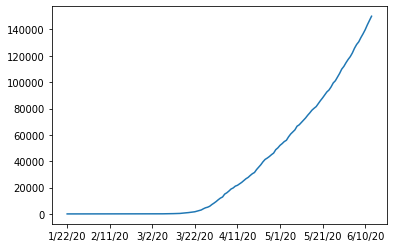

In [0]:
sns.set_style(style = {'figsize': (15, 20)})

# a = covid_ts_confirmed[covid_ts_confirmed.index == 'South Carolina'].drop(columns = ['Admin2']).sum(axis = 0)

state_covid_count = covid_ts_confirmed.drop(columns = ['Admin2']).reset_index().groupby('Province_State').sum()
state_covid_count = state_covid_count.transpose()
state_covid_count.loc[:, 'California'].plot()

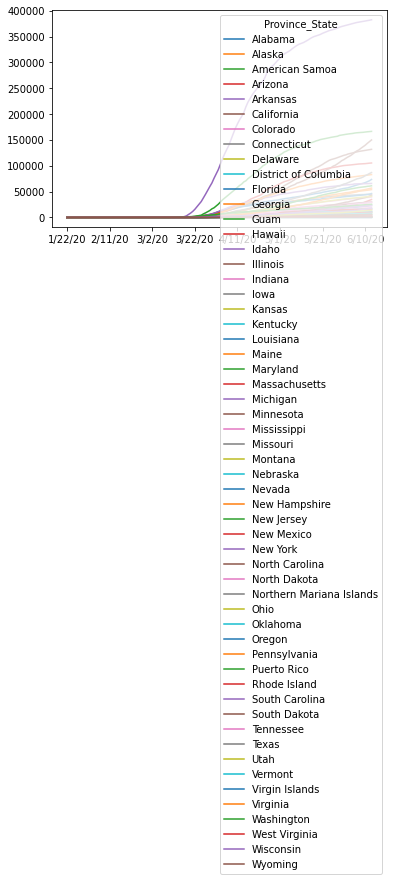

In [0]:
state_covid_count.plot()

In [0]:
state_covid_deaths = covid_ts_deaths.drop(columns = ['Admin2', 'Population']).reset_index().groupby('Province_State').sum()
state_covid_deaths = state_covid_deaths.transpose()

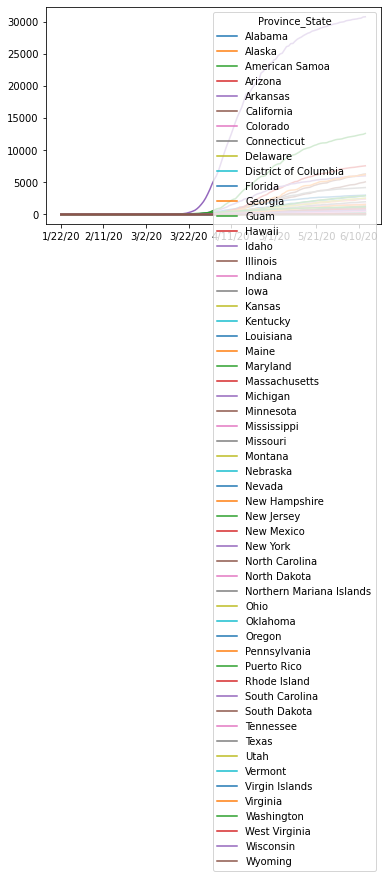

In [0]:
state_covid_deaths.plot()


In [0]:
def get_state_data(df, state):
  return df.loc[state].reset_index().set_index('Admin2').drop(columns = ['Province_State']).transpose()

![替代文字](https://)# Covid Forcasting

In [0]:
# Data to plot
labels = covid_ts_confirmed.Province_State
sizes = covid_ts_confirmed['5/28/20']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, explode=explode, labels=labels, 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

AttributeError: ignored

In [0]:
data = pd.read_csv("New_Covid_Crime.csv",header = None)
x = data[1]
y = data[2]
y1 = data[4]
x = x[1:len(x)]
y = y[1:len(y)]
y1 = y1[1:len(y1)]
y = list(map(int, y))
y1 = list(map(int, y1))
plt.plot(x,y, 'k', label='Confirmed Corona Cases', color='red')
plt.plot(x,y1, 'k', label='Number of Crimes reported', color='skyblue')
plt.yticks(np.arange(min(min(y), min(y1)), max(max(y), max(y1)), 50))
plt.xlabel("date")
plt.xticks(x, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tick_params(axis='y', which='major', labelsize=5)
plt.tight_layout()
plt.title("Time series plot of crimes and corona cases")
plt.legend()
plt.show()

# Hypothesis Testing

### Hypothesis 1:


.....



## Did Covid data change after the lockdown?

In this hypothesis we are going to find out if the covid data changed after the lockdown was imposed in different states. 

The lockdown was imposed in California on 20th march. So we are going to use the covid data before the lockdown and after the lockdown
to check if the data has changed or not. For this purpose we are going to use the right tailed paired t test to see the change in the data before the lockdown and after the lock down. 

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For the choropleth 
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls 

# For the SIR Model 
from scipy.integrate import odeint 

%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv",index_col = 'Province_State')

In [0]:
df.isna().sum()

UID         0
iso2        0
iso3        0
code3       0
FIPS       10
           ..
6/9/20      0
6/10/20     0
6/11/20     0
6/12/20     0
6/13/20     0
Length: 154, dtype: int64

In [0]:
df['FIPS'].unique()

array([6.0000e+01, 6.6000e+01, 6.9000e+01, ..., 9.0056e+04, 9.9999e+04,
              nan])

In [0]:
#Since, the FIPS column is of no use for inference. We can Drop it.
df2 = df.drop(['FIPS'],axis=1)
df3 = df2.drop(['Admin2'],axis=1)
df4 = df3.drop(['UID'],axis=1)
df5 = df4.drop(['code3'],axis=1)

In [0]:
drop_rows = ["iso3", "iso2", "Combined_Key", "Country_Region", "Lat", "Long_"]               # Removing useless columns, such as province codes
ht_df = df5.drop(drop_rows, axis = 1)
ht_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170,171,172,172,172,175,175,177,179,179,179,179,179,180,180,183,183,183
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,24,26,26,26,27,28,30,30,30,30,30
Puerto Rico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185,5329,5352,5536,5690
Virgin Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,71,71,71,71,71,71,72,72,72,72


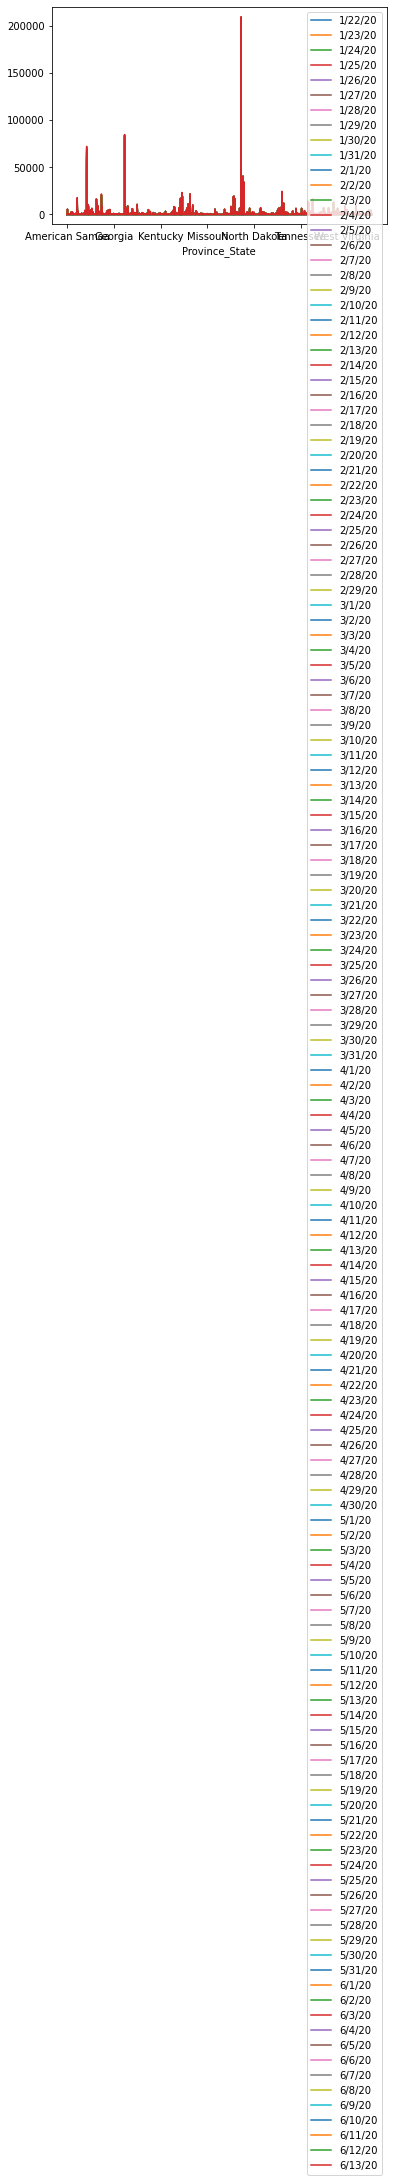

In [0]:
# 
import matplotlib.pyplot as plt
sns.set_style(style = {'figsize': (16, 8)})

ht_df.plot()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Grouper
from datetime import datetime, timedelta
from math import sqrt

CAdata_raw = ht_df.loc["California"]
CAdata_raw.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1809,1863,1917,1961,2023,2064,2101,2133,2178,2234,2367,2351,2392,2457,2522,2560,2609,2708,2760,2847,2874,2986,3049,3097,3195,3289,3390,3470,3515,3548,3641,3725,3805,3805,3945,3985,4033,4232,4216,4217
California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,19,10,10,10,10,10,10,10,10,10,10,10,10,10
California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,18,18,18,18,18,20,20,20,22,22,22,22,24,26,30,31,34,34,34,34,40,40,40,44,44,44,51,51,55,60,65,65,65,68,71,73,73,74,74
California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,15,15,15,15,15,15,15,15,16,19,19,19,19,19,21,25,25,26


In [0]:
CAdata_raw.loc['Total']= CAdata_raw.sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
CAdata_raw.tail()

In [0]:
CAdata = CAdata_raw.loc['Total']
CAdata

In [0]:

# data of the week before the lockdown that is from 12th march to 19th march

# lockdown_date = datetime.strptime("2020-03-20", "%Y-%m-%d").date()
lockdown_date = pd.Timestamp("3/20/20")

#date after three weeks of lockdown 
# a_lockdown_begindate = lockdown_date + timedelta(days=14)
# a_lockdown_enddate = lockdown_date + timedelta(days=21)
# lockdown_begindate = lockdown_date + timedelta(days=0)
# lockafter2_begindate = lockdown_date + timedelta(days=21)
# lockafter2_enddate = lockdown_date + timedelta(days=28)
# lockafter3_begindate = lockdown_date + timedelta(days=28)
# lockafter3_enddate = lockdown_date + timedelta(days=35)

before_ld = CAdata.loc['3/5/20':'3/20/20']
print(before_ld)

lock_d1 = CAdata.loc['3/20/20':'4/3/20']
print(lock_d1)

lock_d2 = CAdata.loc['4/3/20':'4/10/20']
print(lock_d2)

lock_d3 = CAdata.loc['4/10/20':'4/17/20']
print(lock_d3)

lock_d4 = CAdata.loc['4/17/20':'4/24/20']
print(lock_d4)

In [0]:
before_ld_d = before_ld.diff().fillna(0)

In [0]:
lock_d1_d = lock_d1.diff().fillna(0)
lock_d1_d['3/20/20'] = 1243
lock_d1_d 

In [0]:
lock_d2_d = lock_d2.diff().fillna(0)
lock_d2_d['4/3/20'] = 1231.0

In [0]:
lock_d3_d = lock_d3.diff().fillna(0)
lock_d3_d['4/10/20'] = 1371.0

In [0]:
lock_d4_d = lock_d4.diff().fillna(0)
lock_d4_d['4/17/20'] = 1480.0

In [0]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

In [0]:
# plotting the number of deaths weekly
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(before_ld,label = 'Before Lockdown')
plt.plot(lock_d1,label = 'First two weeks of Lockdown')
plt.plot(lock_d2,label = 'Two Weeks after Lockdown')
plt.plot(lock_d3, label = 'Three Weeks after Lockdown')
plt.plot(lock_d4, label = 'Four Weeks after Lockdown')

# lockdownCases = CAdata[CAdata['date']==lockdown_date]['new_deaths']
# plt.scatter(lockdown_date,0,label = 'LockDown Announced date',s = 100)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of cases per day")
plt.legend()
plt.show()

In [0]:
# plotting the number of deaths weekly
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(before_ld_d,label = 'Before Lockdown')
plt.plot(lock_d1_d,label = 'First two weeks of Lockdown')
plt.plot(lock_d2_d,label = 'Two Weeks after Lockdown')
plt.plot(lock_d3_d, label = 'Three Weeks after Lockdown')
plt.plot(lock_d4_d, label = 'Four Weeks after Lockdown')

# lockdownCases = CAdata[CAdata['date']==lockdown_date]['new_deaths']
# plt.scatter(lockdown_date,0,label = 'LockDown Announced date',s = 100)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of cases per day")
plt.legend()
plt.show()

In [0]:
tstat, pvalue, ddof = ttest_ind(
                                before_ld_d,
                                lock_d1_d,
                                alternative="larger",
                                usevar="pooled"
)

In [0]:
print(ddof)

In [0]:
before_ld_d

In [0]:
print(tstat)

In [0]:
pvalue

In [0]:
from scipy import stats
1 - stats.t.cdf(tstat, df=ddof)

In [0]:
tstat, pvalue, ddof = ttest_ind(
                                before_ld_d,
                                lock_d2_d,
                                alternative="larger",
                                usevar="pooled"
)
pvalue

From test 1, the null hypothesis got accepted. We can observe that the number of cases did not decrease 2 weeks after the lockdown when compared to cases before the lockdown. This means that the lockdown did not have any effect on covid 19 cases after two weeks.

From test 2, the null hypothesis got rejected. We can observe that the number of cases did decrease 3 weeks after the lockdown when compared to 2 weeks after the lockdown.

From test 3, the null hypothesis got accepted. We can observe that the number of cases did not decrease 4 weeks after the lockdown when compared to 3 weeks after the lockdown.

From test 4, the null hypothesis got accepted. We can observe that the number of deaths did not decrease 2 weeks after the lockdown when compared to cases before the lockdown. This means that the lockdown did not have any effect on covid 19 deaths after two weeks.

From test 5, the null hypothesis got accepted. We can observe that the number of deaths did not decrease 3 weeks after the lockdown when compared to 2 weeks after the lockdown.

From test 6, the null hypothesis got accepted. We can observe that the number of deaths did not decrease 4 weeks after the lockdown when compared to 3 weeks after the lockdown.

In [0]:
'''                                                                     SIR MODELLING OF DATA                                                                                
##
Components - 
  1. Elements - The "actors" in the model {Persons, animals, pathogens ...}
  2. States - Attributes of system elements 
              - Infecton States {Suscetible, Infected, Recovered ...}
              - Demographic Characteristics {Age, Gender ...}
  3. Transitions - Rates of transition between different states
                  - Can be deterministic (fixed) or stochastic (variable) {We are using a deterministic model}
We are focussing on direct, person-to-person contact since the USA CDC reports that this is the main mode of transmission for COVID-19

##
SIR Model - 
  1. Susceptible   
  2. Infected + Infectious   
  3. Recovered 

##
Effective Contact Rate = Transmission Rate * Contact Rate 
Recovery Rate 
'''

# SIR differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Critical Indices
transmission_rate = 0.8                                             # There is a 20 % chance of getting infected by someone you meet
contact_rate = 120                                                  # A person meets 5 people a day
effective_contact_rate = transmission_rate * contact_rate
recovery_rate = 1/14                                                # It takes 14 days on average to recover

# Demographic 
covid_df["Susceptible"] = covid_df["Population"] - covid_df["Confirmed"] - covid_df["Recovered"]
covid_df["R0"] = effective_contact_rate / recovery_rate

# Timeline 
days = range(0, 30)

# Application of Diff Eqs 
inter = odeint(deriv, [covid_df["Susceptible"][4], covid_df["Confirmed"][4], covid_df["Recovered"][4]], days, args = (covid_df["Population"][4], effective_contact_rate, recovery_rate))
S, I, R = inter.T                                                                                               # List of the number of people who are expected to be infected over the next 160 days

# Dataframe of SIR model 
SIR_df = pd.DataFrame({
    'Susceptible': S,
    'Infected': I,
    'Recovered': R,
    'Day': days
})

# Plot 
plt.style.use('ggplot')
SIR_df.plot(x='Day',
        y=['Infected', 'Susceptible', 'Recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=False)



In [0]:
'''                                                                             COMPARING EFFECTS OF LOCKDOWN                                                                    '''

## Differential Equation Functions 
def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, beta, gamma):
    S, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Changed rates
transmission_rate = 0.35                                             # There is a 20 % chance of getting infected by someone you meet
contact_rate = 150                                                   # A person meets 5 people a day
effective_contact_rate = transmission_rate * contact_rate
recovery_rate = 1/14                                                 # It takes 14 days on average to recover

# Perhaps make the R0 once again

# Demographic 
covid_df["Susceptible"] = covid_df["Population"] - covid_df["Confirmed"] - covid_df["Recovered"]
covid_df["R0"] = effective_contact_rate / recovery_rate

# Timeline 
days = range(0, 30)

# Original Derivation
ret = odeint(deriv,
             [covid_df["Susceptible"][4], covid_df["Confirmed"][4], covid_df["Recovered"][4]],
             days,
             args=(covid_df["Population"][4], effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Adjusted Derivation
ret = odeint(deriv_adjusted,
             [covid_df["Susceptible"][4], covid_df["Confirmed"][4], covid_df["Recovered"][4]],
             days,
             args=(covid_df["Population"][4], effective_contact_rate, recovery_rate))
S_adj, I_adj, R_adj = ret.T

# Building a comparative dataframe 
comp_df = pd.DataFrame({
    'Infected': I,
    'Infected_Lockdown': I_adj,
    'Day': days
})

# Plot
plt.style.use('ggplot')
comp_df.plot(x='Day',
        y=['Infected', 'Infected_Lockdown'])

# SIR Model Extended

### This is just an overall framework for implementation. It is made using confirmed cases. Im going to replicate or change it so we can do it for the number of deaths which I think could be more accurate

In [0]:
import numpy as np
!pip install lmfit
import lmfit

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 256kB 8.7MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81990 sha256=33b3b1087628eb2a4497731a98c9e6a2e5edff1ec101cf905f93968f74113119
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.18-cp36-none-any.whl size=17381 sha256=8898519ff9550f38d240ec15130b74ac606229656b742e981999161381852a3e
  Stored in directory: /root/.cache/pip/wheels/1c/53/1b/28d929700c9633b1786a4982e6db564ec8326a8930234dcc19
Successfully built lmfit asteval


In [0]:
probabilities = pd.read_csv('https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv')
probabilities.head()

,Age,prob_I_to_ICU_1,prob_ICU_to_Death_1,prob_I_to_ICU_2,prob_ICU_to_Death_2
0,0_9,0.001,0.00,0.001,0.00
1,10_19,0.003,0.00,0.003,0.00
2,20_29,0.009,0.05,0.006,0.00
3,30_39,0.025,0.06,0.009,0.00
4,40_49,0.030,0.10,0.025,0.12


In [0]:
agegroups = pd.read_csv('https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/agegroups.csv')
agegroups.head()

,Unnamed: 0,Location,0_9,10_19,20_29,30_39,40_49,50_59,60_69,70_79,80_89,90_100,Total
0,0,World,1.342381e+09,1.253463e+09,1.192080e+09,1.150350e+09,973155000.0,833622000.0,591786000.0,312459000.0,124116000.0,20814000.0,7.794226e+09
1,1,Sustainable Development Goal (SDG) regions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2,2,Sub-Saharan Africa,3.243990e+08,2.534300e+08,1.851890e+08,1.334170e+08,89292000.0,56464000.0,33385000.0,15120000.0,3477000.0,191000.0,1.094364e+09
3,3,Eastern Africa,1.300380e+08,1.056750e+08,7.815600e+07,5.410800e+07,35271000.0,21714000.0,12849000.0,5978000.0,1513000.0,102000.0,4.454040e+08
4,4,Burundi,3.873000e+06,2.725000e+06,2.030000e+06,1.539000e+06,748000.0,492000.0,339000.0,112000.0,30000.0,2000.0,1.189000e+07


In [0]:
agegroups_usa = agegroups[agegroups.Location == 'US'].loc[:, '0_9':].values


In [0]:
cali_covid_count = state_covid_count['California']
cali_covid_count.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    2
Name: California, dtype: int64

In [0]:
beds = pd.read_csv('https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv')
beds.head()

,Country,Continent,ICU_Beds
0,Japan,Asia,7.3
1,South Korea,Asia,10.6
2,Russia,Europe,8.3
3,Germany,Europe,29.2
4,Austria,Europe,21.8


In [0]:
beds_usa = beds[beds.Country == 'North America']

In [0]:
prob_I2C1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I2C2 = list(probabilities.prob_I_to_ICU_2.values)
prob_I2D1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_I2D2 = list(probabilities.prob_ICU_to_Death_2.values)

In [0]:
print(agegroups_usa.sum())

661810000.0


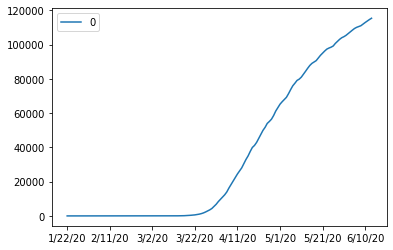

In [0]:
country_covid_deaths = pd.DataFrame(state_covid_deaths.sum(axis = 1))
country_covid_deaths.plot()

In [0]:
'''
Rate from Infected -> ICU = 1/12 
Rate from ICU -> Death = 1/7.5
Rate from ICU -> Recovery = 1/6.5
Rate from Infected -> Recovery = gamma
'''
def deriv(y, t, beta, gamma, sigma, N, p_I2C, p_C2D, Beds):
  S, E, I, C, R, D = y
  #print('beds t = ' + str(Beds(t)))

  dSdt = -beta(t) * I * (S/N)
  dEdt = beta(t) * I * (S/N) - sigma*E
  dIdt = sigma*E -(gamma*(1-p_I2C)*I) - ((1.0/12)*p_I2C*I)
  dCdt = ((1.0/12.0)*p_I2C*I) - ((1.0/6.5)*(1-p_C2D)*min(Beds(t), C)) - ((1.0/7.5)*p_C2D*C*min(Beds(t), C)) - max(0, C - Beds(t))
  dRdt = (gamma * (1-p_I2C) * I) + ((1.0/6.5)*(1-p_C2D)*min(Beds(t), C))
  dDdt = max(0, C - Beds(t)) + ((1.0/7.5)*p_C2D*C*min(Beds(t), C))

  return dSdt, dEdt, dIdt, dCdt, dRdt, dDdt

In [0]:
'''
We take a time dependent r0. For time being we assume that it does not go up (can be changed). 
Based on an external source, Im a using a logistic function here

Feel free to change or experiment with this though. We can definitely optimize later

Also, feel free to change gamma and sigma values
'''

gamma = 1.0/9.0
sigma = 1.0/3.0

def time_dep_r0(t, r0_start, k , x0, r0_end):
  return ((r0_start - r0_end)/(1+np.exp(-k*(-t+x0))))+r0_end

def Model(days, agegroups, beds_per100k, r0_start, k, x0, r0_end, p_I2C, p_C2D, s):

  def beta(t):
    return time_dep_r0(t, r0_start, k , x0, r0_end) * gamma
  N = agegroups.sum()
  print('N = ' + str(N))
  def Beds(t):

    beds_0 = (beds_per100k/100000) * N
    return beds_0 + s*beds_0*t

  y0 = N-1, 1, 0, 0, 0, 0 #one exposed
  t = np.linspace(0, days, days)

  ret = odeint(deriv, y0, t, args = (beta, gamma, sigma, N, p_I2C, p_C2D, Beds))
  S, E, I, C, R, D = ret.T
  r0_time = [beta(i)/gamma for i in range(len(t))]

  return t, S, E, I, C, R, D, r0_time, Beds, p_I2C, p_C2D
  


In [0]:
country_covid_deaths.columns = ['deaths']
cases = country_covid_deaths.deaths.values
beds_per100k = beds_usa['ICU_Beds'].values[0]


In [0]:
cases

To begin with, we assume that virus only started to spread on 22nd Januray 2020. We can change this later by adding an additional parameter

In [0]:
parameters = {'r0_start': (3.0, 0.5, 5.0), 'k': (2.5, 0.01, 5.0), 'x0': (90, 0, 120), 'r0_end': (0.9, 0.3, 3.5), 'p_I2C': (0.05, 0.01, 0.1), 
              'p_C2D': (0.5, 0.05, 0.8), 's': (0.003, 0.001, 0.01)}
recording_delay = 0 #this parameter can be changed if we want to model situation where outbreak did not begin on 22nd January 2020
days = recording_delay + len(cases)
x_data = np.linspace(0, days-1, days, dtype = int)

def fit_model(x, r0_start, k, x0, r0_end, p_I2C, p_C2D, s):
  ret = Model(days, agegroups_usa, beds_per100k, r0_start, k, x0, r0_end, p_I2C, p_C2D, s)
  print('ret')
  print(ret)
  pred_deaths = ret[6]
  return pred_deaths[x]

In [0]:
model = lmfit.Model(fit_model)

for k, (init_val, min_val, max_val) in parameters.items():
  model.set_param_hint(str(k), value = init_val, min = min_val, max = max_val, vary = True)

p = model.make_params()
method = 'leastsq'

Streaming output truncated to the last 5000 lines.
       1.76462405e+06, 1.78233072e+06, 1.79972935e+06, 1.81682530e+06,
       1.83362379e+06, 1.85012998e+06, 1.86634893e+06, 1.88228561e+06,
       1.89794491e+06, 1.91333164e+06, 1.92845053e+06, 1.94330620e+06,
       1.95790323e+06, 1.97224609e+06, 1.98633921e+06, 2.00018689e+06]), array([0.00000000e+00, 9.67332288e-09, 2.44995720e-07, 1.52671123e-06,
       5.45633284e-06, 1.45518197e-05, 3.25202217e-05, 6.47238524e-05,
       1.18892714e-04, 2.06166735e-04, 3.42596482e-04, 5.51290791e-04,
       8.65480191e-04, 1.33287511e-03, 2.02184699e-03, 3.03016582e-03,
       4.49729587e-03, 6.62162991e-03, 9.68446925e-03, 1.40831981e-02,
       2.03767737e-02, 2.93475390e-02, 4.20842513e-02, 6.00922388e-02,
       8.54373571e-02, 1.20931128e-01, 1.70364540e-01, 2.38797482e-01,
       3.32910068e-01, 4.61420648e-01, 6.35574591e-01, 8.69708481e-01,
       1.18189757e+00, 1.59470100e+00, 2.13602939e+00, 2.84017222e+00,
       3.74903538e+00, 4

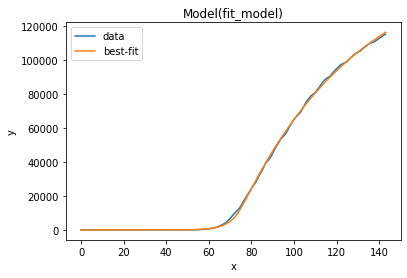

In [0]:
final = model.fit(cases, p, method = 'leastsq', x = x_data)
final.plot_fit(datafmt= '-')

In [0]:
final.best_values

{'k': 2.5003604621427504,
 'p_C2D': 0.4513897511207315,
 'p_I2C': 0.07272751327152346,
 'r0_end': 0.7842215768944489,
 'r0_start': 4.063237463862833,
 's': 0.003,
 'x0': 73.88754050222478}

## Prediction

In [0]:
!pip install tikzplotlib
!pip install plotter
from plotter import Plotter

     |████████████████████████████████| 92kB 2.4MB/s 


In [0]:
a = Model(700, agegroups_usa, beds_per100k, **final.best_values)[7]
pd.DataFrame(a).plot()

TypeError: ignored

In [0]:
death_projection_per_day = [a[i] - a[i-1] for i in range(1, len(a)-1)]
pd.DataFrame(death_projection_per_day).plot()

In [0]:
cases

In [0]:
covid_ts_deaths['5/28/20'].values.sum()

In [0]:
covid_ts_deaths.drop(['American Samoa', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia'], axis = 0).sum()

In [0]:
#Actual
temp = [country_covid_deaths.values[i][0] - country_covid_deaths.values[i-1][0] for i in range(1, 127)]
pd.DataFrame(temp).plot()

In [0]:
#Smoothened model
death_projection_per_day = [a[i] - a[i-1] for i in range(1, len(cases)-1)]
pd.DataFrame(death_projection_per_day).plot()

## SEIR Model further Extended

### Compartments

- S = Susceptibe
- E_tr = Exposed that have been traced
- E_nt = Exposed that have not been traced
- I_asym = Asymptomatic Patients
- I_sym = Symptomatic Patients
- I_sev = Severe Patients
- Q_asym = Asymptomatic quarantined patients
- Q_sym = Symptomatic quarantined patients
- Q_sev = Severe(ly ill) quarantined patients
- R = Recovered 
- D = Dead

### Variables

- beta_asym = Infection rate for asym
- beta_sym = Infection rate for sym
- beta_sev = Infection rate for sev
- w_carrier = Fraction of infected that are traced effectively (thus there are eiher symptomatic or severe)
- w_recipient = Fraction of contact of infected that use tracer effectively
- N = Total number of people in population
- n = Fraction of infected that are asymptomatic
- v = Fraction of symptomatic that are severe 
- sigma = Rate of infection
- gamma_asym = Rate of recovery for asymptomatic patients
- gamma_sym = Rate of recovery for symptomatic patients
- gamma_sev_r = Rate of recovery for severe patients = 1/6.5
- gamma_sev_d = Rate of death for severe patients = 1/7.5
- Beds(t) = Number of beds at time t
- delta = Fraction of severe cases that die = 
### 

####Check the beds formula again for inconsistency. Try again by instead making delta a function of time rather than using min max bullshit


  

In [0]:
#def deriv(y, t, beta, gamma, sigma, N, p_I2C, p_C2D, Beds):

def deriv_extended(y, t, beta_asym, beta_sym, beta_sev, Beds, delta, n, N):
  S, E_tr, E_nt, I_asym, I_sym, I_sev, Q_asym, Q_sym, Q_sev, R, D = y  

  #these are assumptions; can be changed as seen fit 
  gamma_sev_r = 1.0/20.0
  gamma_sev_d = 1.0/14.0
  gamma_sym = 1.0/12.5
  gamma_asym = 1.0/10.0
  sigma = 1.0/5.0
  v = 0.015
  w_carrier = 0.2
  w_recipient = 0.15
  
   #this can probably be trained
  #For training these can be put into the function definition
  print("NNNNNN")
  print(n)
  dSdt = -(beta_asym(t)*I_asym + beta_sym(t)*I_sym + beta_sev(t)*I_sev)*(S/N)
  dE_ntdt = (beta_asym(t)*I_asym*(S/N)) + (((beta_sym(t)*(1-(w_carrier*w_recipient))*I_sym) + (beta_sev(t)*(1-(w_carrier*w_recipient))*I_sev))*(S/N)) - (sigma*E_nt)
  dE_trdt = (((beta_sym(t) * w_carrier * w_recipient * I_sym) + (beta_sev(t)*w_carrier*w_recipient*I_sev))*(S/N)) - (sigma*E_tr)
  dI_asymdt = (n*(1.0/5.0)*E_nt) - ((1.0/10.0) * I_asym)
  dI_symdt = ((1-n)*(1-v)*sigma*E_nt) - (gamma_sym * I_sym)
  dI_sevdt = ((1-n)*v*sigma*E_nt) - ((1-delta)*gamma_sev_r*min(I_sev + Q_sev, Beds(t))) - (delta*gamma_sev_d*min(I_sev + Q_sev, Beds(t))) - max(0, I_sev + Q_sev - Beds(t))
  dQ_asymdt = (n*sigma*E_tr) - (gamma_asym*Q_asym)
  dQ_symdt= ((1-n)*(1-v)*sigma*E_tr) - (gamma_sym*Q_sym)
  dQ_sevdt = ((1-n)*v*sigma*E_tr) - ((1-delta)* gamma_sev_r*min(Q_sev + I_sev, Beds(t))) - (delta * gamma_sev_d * min(Q_sev + I_sev, Beds(t))) - max(0, Q_sev + I_sev - Beds(t))
  dRdt = (gamma_asym * I_asym) + (gamma_sym * I_sym) + (gamma_asym * Q_asym) + (gamma_sym * Q_sym) + ((1-delta) * gamma_sev_r * min(I_sev + Q_sev, Beds(t))) + ((1-delta)*gamma_sev_r*min(Q_sev + I_sev, Beds(t)))
  dDdt = (delta * gamma_sev_d * min(I_sev + Q_sev, Beds(t))) + (delta * gamma_sev_d * min(Q_sev + I_sev, Beds(t))) + max(0, I_sev + Q_sev - Beds(t))

  return dSdt, dE_ntdt, dE_trdt, dI_asymdt, dI_symdt, dI_sevdt, dQ_asymdt, dQ_symdt, dQ_sevdt, dRdt, dDdt

In [0]:
?odeint

In [0]:
#Variables here are assumed; change them after discussion

gamma_asym = 1.0/9.0
gamma_sym = 1.0/9.0
gamma_sev_r = 1.0/20.0
gamma_sev_d = 1.0/14.0
sigma = 1.0/5.0



def time_dep_r0_asym(t, r0_start_asym, k_asym , x0, r0_end_asym):
  return ((r0_start_asym - r0_end_asym)/(1+np.exp(-k_asym*(-t+x0))))+r0_end_asym

def time_dep_r0_sym(t, r0_start_sym, k_sym , x0, r0_end_sym):
  return ((r0_start_sym - r0_end_sym)/(1+np.exp(-k_sym*(-t+x0))))+r0_end_sym

def time_dep_r0_sev(t, r0_start_sev, k_sev , x0, r0_end_sev):
  return ((r0_start_sev - r0_end_sev)/(1+np.exp(-k_sev*(-t+x0))))+r0_end_sev

def Model(days, agegroups, beds_per100k, r0_start_asym, r0_start_sym, r0_start_sev, k_sym, k_asym, k_sev, x0, r0_end_asym, r0_end_sym, r0_end_sev, 
          delta, n, s):

  def beta_asym(t):
    return (time_dep_r0_asym(t, r0_start_asym, k_asym , x0, r0_end_asym) * gamma_asym)

  def beta_sym(t):
    return (time_dep_r0_sym(t, r0_start_sym, k_sym , x0, r0_end_sym) * gamma_sym)

  def beta_sev(t):
    return (time_dep_r0_sev(t, r0_start_sev, k_sev , x0, r0_end_sev) * gamma_sev_r) #look more into this

  N = agegroups_usa.sum()
  
  def Beds(t):

    beds_0 = (beds_per100k/100000) * N
    return beds_0 + s*beds_0*t
  print(N)
  y0 = N-1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0 #one exposed

  t = np.linspace(0, days, days)

  ret = odeint(deriv_extended, y0, t, args = (beta_asym, beta_sym, beta_sev, Beds, delta, n, N))
  S, E_tr, E_nt, I_asym, I_sym, I_sev, Q_asym, Q_sym, Q_sev, R, D = ret.T
  r0_asym_time = [beta_asym(i)/gamma_asym for i in range(len(t))]
  r0_sym_time = [beta_sym(i)/gamma_sym for i in range(len(t))]
  r0_sev_time = [beta_sev(i)/gamma_sev_r for i in range(len(t))]

  # print(t==np.nan)
  # print(r0_asym_time==np.nan)
  # print(r0_sym_time==np.nan)
  # print(r0_sev_time==np.nan)
  # print(delta==np.nan)
  # temp = ret.T == np.nan
  # print(temp.sum())
  # print(w_carrier)
  # print(w_recipient)
  # print(Beds)
  # print(n)
  return t, S, E_tr, E_nt, I_asym, I_sym, I_sev, Q_asym, Q_sym, Q_sev, R, D, r0_asym_time, r0_sym_time, r0_sev_time, Beds, delta, n
  

# 

In [0]:
country_covid_deaths.columns = ['deaths']
cases = country_covid_deaths.deaths.values
beds_per100k = beds_usa['ICU_Beds'].values[0]

In [0]:
# parameters = {'r0_start_sym': (3.0, 0.5, 5.0), 'r0_start_asym': (5.0, 0.5, 9.0), 'r0_start_sev': (2.0, 0.0, 4.0), 'k_asym': (2.5, 0.01, 5.0), 'k_sym': (2.5, 0.01, 5.0),
#               'k_sev': (2.5, 0.01, 5.0), 'x0': (90, 0, 120), 
#               'r0_end_sym': (0.9, 0.3, 3.5), 'r0_end_asym': (2.0, 0.3, 5.5), 'r0_end_sev': (0.7, 0.0, 1.5), 'delta': (0.5, 0.05, 0.8), 's': (0.003, 0.001, 0.01),
#               'n':(0.2, 0.0, 0.4)}
parameters = {'r0_start_sym': (3.0), 'r0_start_asym': (5.0), 'r0_start_sev': (2.0), 'k_asym': (2.5), 'k_sym': (2.5),
              'k_sev': (2.5), 'x0': (90), 
              'r0_end_sym': (0.9), 'r0_end_asym': (2.0), 'r0_end_sev': (0.7), 'delta': (0.5), 's': (0.003),
              'n':(0.4)}
recording_delay = 0 #this parameter can be changed if we want to model situation where outbreak did not begin on 22nd January 2020
days = recording_delay + len(cases)
x_data = np.linspace(0, days-1, days, dtype = int)

def fit_model(x, r0_start_sym,r0_start_asym, r0_start_sev, k_sym, k_asym, k_sev, x0, r0_end_sym, r0_end_asym, r0_end_sev, delta, n, s):
  ret = Model(days, agegroups, beds_per100k, r0_start_asym, r0_start_sym, r0_start_sev, k_sym, k_asym, k_sev, x0, r0_end_asym, r0_end_sym, r0_end_sev, delta, n, s)
  pred_deaths = ret[11]
  return pred_deaths[x]

In [0]:
model = lmfit.Model(fit_model)

for k, (init_val) in parameters.items():
  model.set_param_hint(str(k), value = init_val, min_val = 0, vary = True)

p = model.make_params()
method = 'leastsq'

# Improved Model

In [0]:
def deriv(y, t, beta, gamma, sigma, N, p_I2C, p_C2D, Beds, w_carrier, w_recipient):
  S, E_tr, E_nt, I, Q, C, R, D = y
  #print('beds t = ' + str(Beds(t)))
  dSdt = -beta(t) * I * (S/N)
  dE_trdt = (beta(t) * w_carrier * w_recipient * I * (S/N)) - sigma*E_tr
  dE_ntdt = (beta(t) * (1- (w_carrier * w_recipient)) * I * (S/N)) - sigma*E_nt
  dIdt = sigma*E_nt -(gamma*(1-p_I2C)*I) - ((1.0/12.0)*p_I2C*I)
  dQdt = sigma*E_tr - (gamma * (1-p_I2C)*Q) - ((1.0/12.0)*p_I2C*Q)
  dCdt = ((1.0/12.0)*p_I2C*I) + ((1.0/12.0)*p_I2C*Q) - ((1.0/6.5)*(1-p_C2D)*min(Beds(t), C)) - ((1.0/7.5)*p_C2D*C*min(Beds(t), C)) - max(0, C - Beds(t))
  dRdt = (gamma * (1-p_I2C) * I) + (gamma * (1-p_I2C) * Q) + ((1.0/6.5)*(1-p_C2D)*min(Beds(t), C))
  dDdt = max(0, C - Beds(t)) + ((1.0/7.5)*p_C2D*C*min(Beds(t), C))

  return dSdt, dE_trdt, dE_ntdt, dIdt, dQdt, dCdt, dRdt, dDdt

In [0]:
gamma = 1.0/9.0
sigma = 1.0/3.0

def time_dep_r0(t, r0_start, k , x0, r0_end):
  return ((r0_start - r0_end)/(1+np.exp(-k*(-t+x0))))+r0_end

def Model(y0, days, agegroups, beds_per100k, r0_start, k, x0, r0_end, p_I2C, p_C2D, s, w_carrier, w_recipient):
  def beta(t):
    return time_dep_r0(t, r0_start, k , x0, r0_end) * gamma
  N = agegroups.sum()
  def Beds(t):
    beds_0 = (beds_per100k/100000) * N
    return beds_0 + s*beds_0*t

  y0 = y0 #one exposed
  t = days #REMEMBER THIS

  ret = odeint(deriv, y0, t, args = (beta, gamma, sigma, N, p_I2C, p_C2D, Beds, w_carrier, w_recipient))
  S, E_tr, E_nt, I, Q, C, R, D = ret.T
  r0_time = [beta(i)/gamma for i in t]

  return t, S, E_tr, E_nt, I, Q, C, R, D, r0_time, Beds, p_I2C, p_C2D

In [0]:
country_covid_deaths.columns = ['deaths']
cases = country_covid_deaths.deaths.values
beds_per100k = beds_usa['ICU_Beds'].values[0]
N = agegroups_usa.sum()

In [0]:
import numpy as np
parameters = {'r0_start': (3.0, 0.5, 5.0), 'k': (2.5, 0.01, 5.0), 'x0': (90, 0, 120), 'r0_end': (0.9, 0.5, 3.5), 'p_I2C': (0.05, 0.01, 0.1), 
              'p_C2D': (0.5, 0.05, 0.8), 's': (0.003, 0.001, 0.01)}
recording_delay = 0 #this parameter can be changed if we want to model situation where outbreak did not begin on 22nd January 2020
days = np.arange(0, recording_delay + len(cases))
# x_data = np.linspace(0, days-1, days, dtype = int)
y0 = N-1, 0, 1, 0, 0, 0, 0, 0
def fit_model(x, r0_start, k, x0, r0_end, p_I2C, p_C2D, s):
  ret = Model(y0, days, agegroups_usa, beds_per100k, r0_start, k, x0, r0_end, p_I2C, p_C2D, s, w_carrier = 0, w_recipient = 0)
  pred_deaths = ret[8]
  return pred_deaths[x]

In [0]:
model = lmfit.Model(fit_model)

for k, (init_val, min_val, max_val) in parameters.items():
  model.set_param_hint(str(k), value = init_val, min = min_val, max = max_val, vary = True)

p = model.make_params()
method = 'leastsq'

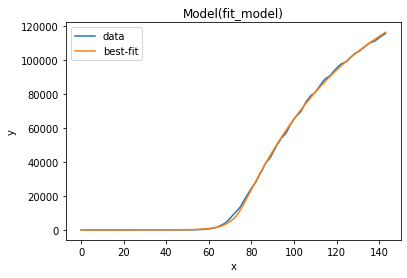

In [0]:
final = model.fit(cases, p, method = 'leastsq', x = days)
final.plot_fit(datafmt= '-')

In [0]:
final.best_values

{'k': 3.0286949767503826,
 'p_C2D': 0.7903041452567701,
 'p_I2C': 0.09992915462092085,
 'r0_end': 0.7647222494074517,
 'r0_start': 3.9555692696993723,
 's': 0.003,
 'x0': 74.06559834710357}

In [0]:
m = Model(y0, np.arange(0, len(cases)), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)  
pred = pd.DataFrame(m[8])
fig_summary_usa = go.Figure()
dt = pd.date_range(start = '1/22/20', end = '6/13/20')
fig_summary_usa.add_trace(go.Scatter(x = dt, y = country_covid_deaths.iloc[:, 0], mode = "lines+markers", name = "Actual Cases"))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = pred.iloc[:, 0], mode = "lines+markers", name = "Prediction"))

fig_summary_usa.update_layout(xaxis_title ="Date", yaxis_title ="Number of Deaths", height =800, width = 1000)

fig_summary_usa.show()


In [0]:
country_covid_deaths

,deaths
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
6/9/20,112011
6/10/20,112932
6/11/20,113820
6/12/20,114666


In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(m[8], country_covid_deaths.deaths.values)

455.03652110966533

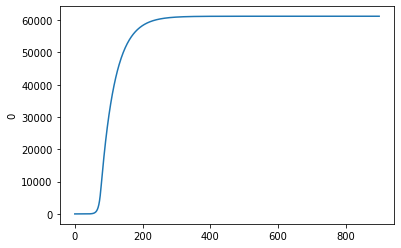

In [0]:
m = Model(y0, np.arange(0, 900), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.2, w_recipient = 0.3)  
n = Model(y0, np.arange(0,900), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.1, w_recipient = 0.15)  

a = m[8]
b = n[8]
pd.DataFrame(a)
sns.lineplot(x = pd.DataFrame(a).index, y = pd.DataFrame(a).iloc[:, 0])

In [0]:
a = Model(y0, np.arange(140), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)[7]
pd.DataFrame(a).plot()

# Scenario 1: If contact tracing capacity improves with maintained social distancing measures that reduce r0 below 1

Contact tracing will bring incremental advantages 

In [0]:
import seaborn as sns
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls 

In [0]:
# create model; predict for 140 days; calculate number of S, E_tr, etc. then run the rote calculations for another 200 days and visualize the results

dt = pd.date_range(start="1/22/20",end="31/12/20")

N = agegroups_usa.sum()
y = N-1, 0, 1, 0, 0, 0, 0, 0
m = Model(y, np.arange(0, 140), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)  
S = m[1][-1] 
E_tr = m[2][-1] 
E_nt = m[3][-1] 
I = m[4][-1] 
Q = m[5][-1] 
C = m[6][-1] 
R = m[7][-1] 
D = m[8][-1]

# def Beds_extended(t):

#     beds_0 = (beds_per100k/100000) * agegroups_usa.sum()
#     return beds_0 + final.best_values['s']*beds_0*(t)

# def pred(y, t, beta, gamma, sigma, N, p_I2C, p_C2D, Beds, w_carrier, w_recipient):
#   deaths = []
#   S, E_tr, E_nt, I, Q, C, R, D = y
#   for i in range(t):
#   #print('beds t = ' + str(Beds(t)))
#     S += -beta * I * (S/N)
#     E_tr += (beta * w_carrier * w_recipient * I * (S/N)) - sigma*E_tr
#     E_nt += (beta * (1- (w_carrier * w_recipient)) * I * (S/N)) - sigma*E_nt
#     I += sigma*E_nt -(gamma*(1-p_I2C)*I) - ((1.0/12.0)*p_I2C*I)
#     Q += sigma*E_tr - (gamma * (1-p_I2C)*Q) - ((1.0/12.0)*p_I2C*Q)
#     C += ((1.0/12.0)*p_I2C*I) + ((1.0/12.0)*p_I2C*Q) - ((1.0/6.5)*(1-p_C2D)*min(Beds(t), C)) - ((1.0/7.5)*p_C2D*C*min(Beds(t), C)) - max(0, C - Beds(t))
#     C = max(0, C)
#     print(C)
#     R += (gamma * (1-p_I2C) * I) + (gamma * (1-p_I2C) * Q) + ((1.0/6.5)*(1-p_C2D)*min(Beds(t), C))
#     D += max(0, C - Beds(t)) + ((1.0/7.5)*p_C2D*C*min(Beds(t), C))
#     deaths.append(D)
  
#   return deaths



# y = S, E_tr, E_nt, I, Q, C, R, D
# beta = final.best_values['r0_end']* (1.0/9.0)
# days = range(140, 301)
# ret = odeint(deriv,
#              [S, E_tr, E_nt, I, Q, C, R, D],
#              days,
#              args=(beta, (1.0/9.0), (1.0/3.0), agegroups_usa.sum(),final.best_values['p_I2C'], final.best_values['p_C2D'], Beds_extended, 0, 0))
# d_append = pred(y, 200, beta, (1.0/9.0), (1.0/3.0), agegroups_usa.sum(),final.best_values['p_I2C'], final.best_values['p_C2D'], Beds_extended, 0, 0)
days = np.arange(140, len(dt))
y = S, E_tr, E_nt, I, Q, C, R, D

sc_1 = Model(y, days, agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.3, w_recipient = 0.25)
sc_2 = Model(y, days, agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)
sc_3 = Model(y, days, agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.5, w_recipient = 0.5)



deaths_sc1 = pd.DataFrame(np.append(m[8],sc_1[8]))
deaths_sc2 = pd.DataFrame(np.append(m[8], sc_2[8]))
deaths_sc3 = pd.DataFrame(np.append(m[8], sc_3[8]))

fig_summary_usa = go.Figure()

fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc2.iloc[:, 0], mode = "lines+markers", name = "Low Contact Tracing"))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc1.iloc[:, 0], mode = "lines+markers", name = "Medium Contact Tracing"))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc3.iloc[:, 0], mode = "lines+markers", name = "High Contact Tracing"))


fig_summary_usa.update_layout(xaxis_title ="Days since Jan 22", yaxis_title ="Number of Deaths", height =800, width = 1000)
fig_summary_usa.show()



# Scenario 2: Contact tracing capacity improves with social distancing worsening due to openings leading to way more deaths. Ultimately, a violation of social distancing measures would make the entire pandemic worse. Contact tracing would only work if social distancing remains and we are not stupid

In [0]:
# do the same thing but with r0 rising to 2 3 and 4 and see how bad things can get (approximately 700000 deaths)
days = np.arange(140, len(dt))
m = Model(y0, np.arange(0, 140), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)  
copy = final.best_values.copy()
copy.pop('r0_end')

sc_1 = Model(y, days, agegroups_usa, beds_per100k, r0_end = 1.07, **copy, w_carrier = 0.3, w_recipient = 0.25)
sc_2 = Model(y, days, agegroups_usa, beds_per100k, r0_end = 1.07, **copy, w_carrier = 0, w_recipient = 0)
sc_3 = Model(y, days, agegroups_usa, beds_per100k, r0_end = 1.07, **copy, w_carrier = 0.5, w_recipient = 0.5)

deaths_sc1 = pd.DataFrame(np.append(m[8],sc_1[8]))
deaths_sc2 = pd.DataFrame(np.append(m[8], sc_2[8]))
deaths_sc3 = pd.DataFrame(np.append(m[8], sc_3[8]))

fig_summary_usa = go.Figure()
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc2.iloc[:, 0], mode = "lines+markers", name = "Low Contact Tracing", ))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc1.iloc[:, 0], mode = "lines+markers", name = "Medium Contact Tracing"))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc3.iloc[:, 0], mode = "lines+markers", name = "High Contact Tracing"))

fig_summary_usa.update_layout(xaxis_title ="Days since Jan 22", yaxis_title ="Number of Deaths", height =800, width = 1000)

fig_summary_usa.show()

# Scenario 3: 

In [0]:
# do the same thing but with r0 rising to 2 3 and 4 and see how bad things can get (approximately 700000 deaths)
dt = pd.date_range(start = '1/22/20', end = '12/31/20')
days = np.arange(140, len(dt))
m = Model(y0, np.arange(0, 140), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)  
copy = final.best_values.copy()
copy.pop('r0_end')

sc_1 = Model(y, days, agegroups_usa, beds_per100k, r0_end = 1.07, **copy, w_carrier = 0, w_recipient = 0)
sc_2 = Model(y, days, agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)

deaths_sc1 = pd.DataFrame(np.append(m[8],sc_1[8]))
deaths_sc2 = pd.DataFrame(np.append(m[8], sc_2[8]))

fig_summary_usa = go.Figure()
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc1.iloc[:, 0], mode = "lines+markers", name = "People don't follow social distancing", ))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc2.iloc[:, 0], mode = "lines+markers", name = "People follow social distancing"))

fig_summary_usa.update_layout(xaxis_title ="Days since Jan 22", yaxis_title ="Number of Deaths", height =800, width = 1000)

fig_summary_usa.show()

In [0]:
dt = pd.date_range(start = '1/22/20', end = '12/31/20')
days = np.arange(140, len(dt))
m = Model(y0, np.arange(0, 140), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0, w_recipient = 0)  
copy = final.best_values.copy()
copy.pop('r0_end')

sc_1 = Model(y, days, agegroups_usa, beds_per100k, r0_end = 1.07, **copy, w_carrier = 0.5, w_recipient = 0.5)
sc_2 = Model(y, days, agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.5, w_recipient = 0.5)

deaths_sc1 = pd.DataFrame(np.append(m[8],sc_1[8]))
deaths_sc2 = pd.DataFrame(np.append(m[8], sc_2[8]))

fig_summary_usa = go.Figure()
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc1.iloc[:, 0], mode = "lines+markers", name = "Low Contact Tracing", ))
fig_summary_usa.add_trace(go.Scatter(x = dt, y = deaths_sc2.iloc[:, 0], mode = "lines+markers", name = "Medium Contact Tracing"))

fig_summary_usa.update_layout(xaxis_title ="Days since Jan 22", yaxis_title ="Number of Deaths", height =800, width = 1000)

fig_summary_usa.show()

# SEIR model run state-wise - Identifying hotspots, etc. -> california, new york => certain hotspots with high likelihood of resurgence and they should be isolated

In [0]:
state_covid_ts = covid_ts_deaths.reset_index().groupby('Province_State').sum().drop(columns = ['Population']).transpose()
cali_covid_ts = covid_ts_deaths.reset_index()
cali_covid_ts = cali_covid_ts[cali_covid_ts.Province_State == 'Pennsylvania'].drop(columns = ['Province_State', 'Population']).set_index('Admin2').transpose()
cali_covid_ts.head()

Admin2,Adams,Allegheny,Armstrong,Beaver,Bedford,Berks,Blair,Bradford,Bucks,Butler,Cambria,Cameron,Carbon,Centre,Chester,Clarion,Clearfield,Clinton,Columbia,Crawford,Cumberland,Dauphin,Delaware,Elk,Erie,Fayette,Forest,Franklin,Fulton,Greene,Huntingdon,Indiana,Jefferson,Juniata,Lackawanna,Lancaster,Lawrence,Lebanon,Lehigh,Luzerne,Lycoming,McKean,Mercer,Mifflin,Monroe,Montgomery,Montour,Northampton,Northumberland,Perry,Philadelphia,Pike,Potter,Schuylkill,Snyder,Somerset,Sullivan,Susquehanna,Tioga,Union,Venango,Warren,Washington,Wayne,Westmoreland,Wyoming,York,Out of PA,Unassigned
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def create_model(county, state_covid_ts):

  df = state_covid_ts[country]
  df.columns = ['deaths']
  cases = df.deaths.values
  beds_per100k = beds_usa['ICU_Beds'].values[0]
  N = agegroups_usa.sum()

In [0]:
import numpy as np
parameters = {'r0_start': (3.0, 0.5, 5.0), 'k': (2.5, 0.01, 5.0), 'x0': (90, 0, 120), 'r0_end': (0.9, 0.3, 3.5), 'p_I2C': (0.05, 0.01, 0.1), 
              'p_C2D': (0.5, 0.05, 0.8), 's': (0.003, 0.001, 0.01)}
recording_delay = 0 #this parameter can be changed if we want to model situation where outbreak did not begin on 22nd January 2020
days = np.arange(0, recording_delay + len(cases))
# x_data = np.linspace(0, days-1, days, dtype = int)
y0 = N-1, 0, 1, 0, 0, 0, 0, 0
def fit_model(x, r0_start, k, x0, r0_end, p_I2C, p_C2D, s):
  ret = Model(y0, days, agegroups_usa, beds_per100k, r0_start, k, x0, r0_end, p_I2C, p_C2D, s, w_carrier = 0, w_recipient = 0)
  pred_deaths = ret[8]
  return pred_deaths[x]

In [0]:
model = lmfit.Model(fit_model)

for k, (init_val, min_val, max_val) in parameters.items():
  model.set_param_hint(str(k), value = init_val, min = min_val, max = max_val, vary = True)

p = model.make_params()
method = 'leastsq'

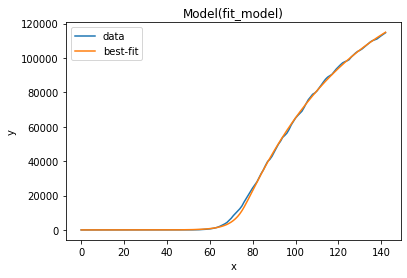

In [0]:
final = model.fit(cases, p, method = 'leastsq', x = days)
final.plot_fit(datafmt= '-')

In [0]:
final.best_values

{'k': 3.8649190935951667,
 'p_C2D': 0.7998310710442387,
 'p_I2C': 0.09983672831794503,
 'r0_end': 0.7535098065061036,
 'r0_start': 3.9281543851070664,
 's': 0.003,
 'x0': 74.73062381179895}

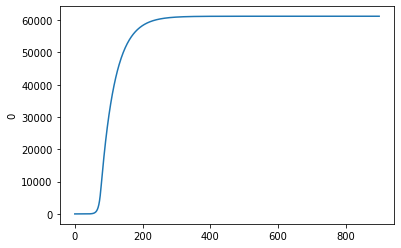

In [0]:
m = Model(y0, np.arange(0, 900), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.2, w_recipient = 0.3)  
n = Model(y0, np.arange(0,900), agegroups_usa, beds_per100k, **final.best_values, w_carrier = 0.1, w_recipient = 0.15)  

a = m[8]
b = n[8]
pd.DataFrame(a)
sns.lineplot(x = pd.DataFrame(a).index, y = pd.DataFrame(a).iloc[:, 0])

In [0]:
agegroups_usa.sum()

In [0]:
np.arange(140, 300)

In [0]:
def time_dep_r0(t, r0_start, k , x0, r0_end):
  return ((r0_start - r0_end)/(1+np.exp(-k*(-t+x0))))+r0_end
time_dep_r0(141, 4.5, 25 , 74.4, 3.5)

In [0]:
a = final.best_values.copy()
a.pop('r0_end')

In [0]:
country_covid_deaths.head()

,deaths
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [0]:
dt = pd.date_range(start="1/22/20",end="31/12/20")
len(dt)

345